<a href="https://colab.research.google.com/github/Nanda-0101/portofolio_aja/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("gojek.csv")
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,001fbdcd-0bae-49eb-b2d4-05e78eed6dd8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aku sudah 3th pakai gojek karena drivernya ram...,5.0,0.0,5.19.2,2025-05-27 11:06:17,NaN,NaN,5.19.2
1,4c7ec9fa-4005-461d-b48f-97d0595145c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,daftar meñjadi driver gojek-Go Partner seperti...,2.0,0.0,4.36.1,2025-05-27 11:02:15,"Hai Kak Ray, mohon maaf untuk kendalanya. Lapo...",2025-05-27 14:14:03,4.36.1
2,4c46cabb-93e2-4102-9911-854bdfe074da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"baguss, murah² juga harganya",5.0,0.0,5.19.2,2025-05-27 10:58:23,NaN,NaN,5.19.2
3,bcba130f-f286-418d-9123-f20f7637831a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menyenangkan,5.0,0.0,5.19.2,2025-05-27 10:57:03,NaN,NaN,5.19.2
4,4a4b714e-be8a-4450-bb6f-2ebbd230511c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap sesuai dgn tujuan,5.0,0.0,5.19.2,2025-05-27 10:47:32,NaN,NaN,5.19.2
...,...,...,...,...,...,...,...,...,...,...,...
35870,3f9a352c-45bf-4f74-bddd-476ab42f8020,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kedua kalinya saya dipaksa untuk cancel ordera...,1.0,1.0,NaN,2024-11-19 13:02:46,"Mohon maaf atas kendalanya, Kak Eko. Kesulitan...",2024-11-19 14:49:15,NaN
35871,62233720-9ca1-42c0-9bf0-127a8d40f030,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Masih masalah yang sama susah dapet driver di ...,1.0,0.0,NaN,2024-11-19 12:56:53,"Mohon maaf atas kendalanya, Kak Juli. Kesulita...",2024-11-19 14:46:53,NaN
35872,85035777-5213-45a4-83e3-04d218b08378,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus mantap,",5.0,0.0,NaN,2024-11-19 12:55:51,NaN,NaN,NaN
35873,c6dc9a84-d7f5-4657-8174-513591cf156a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kalo pas hujan tidak dapat driver terus,1.0,0.0,NaN,2024-11-19 12:54:08,"Mohon maaf atas kendalanya, Kak Elham. Kesulit...",2024-11-19 14:43:29,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35875 entries, 0 to 35874
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              35875 non-null  object 
 1   userName              35875 non-null  object 
 2   userImage             35875 non-null  object 
 3   content               35874 non-null  object 
 4   score                 35874 non-null  float64
 5   thumbsUpCount         35874 non-null  float64
 6   reviewCreatedVersion  27953 non-null  object 
 7   at                    35874 non-null  object 
 8   replyContent          11232 non-null  object 
 9   repliedAt             11232 non-null  object 
 10  appVersion            27953 non-null  object 
dtypes: float64(2), object(9)
memory usage: 3.0+ MB


In [ ]:
df.isnull().sum()


,0
reviewId,0
userName,0
userImage,0
content,1
score,1
thumbsUpCount,1
reviewCreatedVersion,7922
at,1
replyContent,24643
repliedAt,24643


In [ ]:
df['score'].value_counts().sort_index()


,count
score,
1.0,9076
2.0,1337
3.0,1266
4.0,1796
5.0,22399


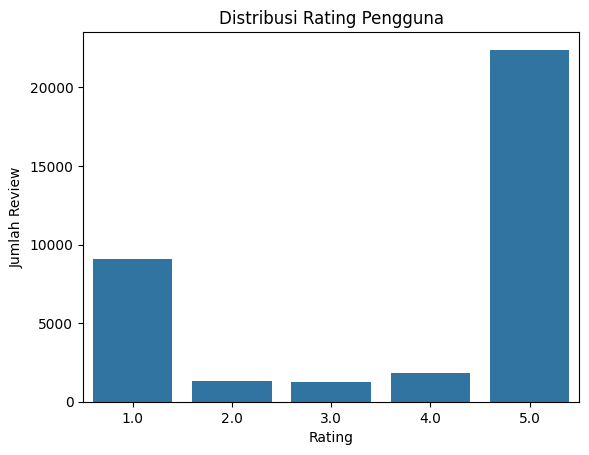

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='score')
plt.title('Distribusi Rating Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.show()


In [ ]:
df['at'] = pd.to_datetime(df['at'])


<ipython-input-9-f4296eca88ae>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('at').resample('M').count()['reviewId'].plot()


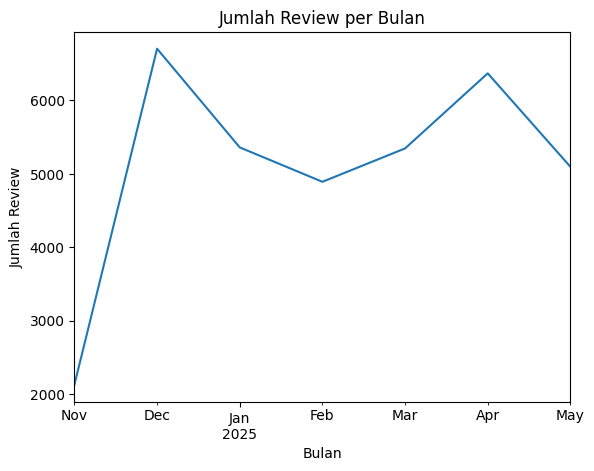

In [ ]:
df.set_index('at').resample('M').count()['reviewId'].plot()
plt.title('Jumlah Review per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Review')
plt.show()


In [ ]:
df['sentiment'] = df['score'].apply(lambda x: 'sangat baik' if x == 5
                                    else 'baik' if x == 4
                                    else 'netral' if x == 3
                                    else 'buruk' if x == 2
                                    else 'sangat buruk')

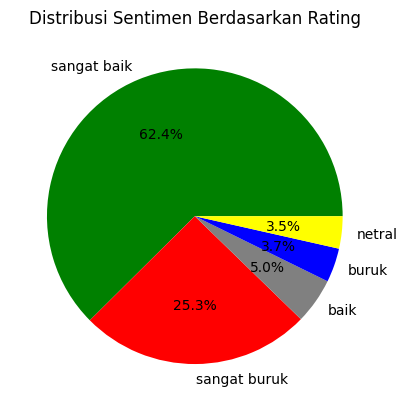

In [ ]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red', 'gray', 'blue', 'yellow'])
plt.title('Distribusi Sentimen Berdasarkan Rating')
plt.ylabel('')
plt.show()


In [ ]:
df['has_reply'] = df['replyContent'].notnull()
reply_rate = df['has_reply'].mean()
print(f"Persentase review yang dibalas: {reply_rate:.2%}")


Persentase review yang dibalas: 31.31%


In [ ]:
df.groupby('has_reply')['score'].mean()


,score
has_reply,
False,4.831670
True,1.394676


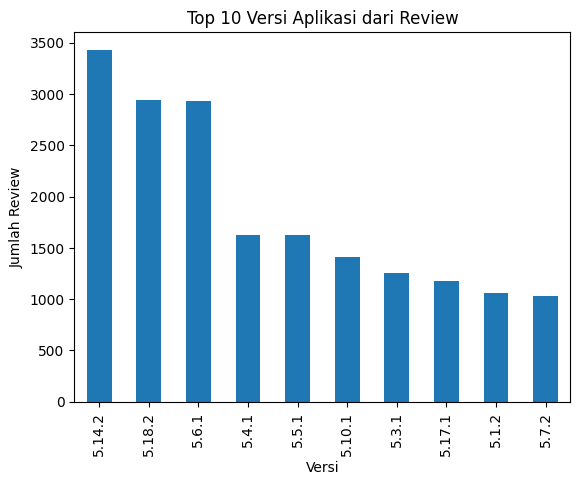

In [ ]:
df['appVersion'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Versi Aplikasi dari Review')
plt.xlabel('Versi')
plt.ylabel('Jumlah Review')
plt.show()


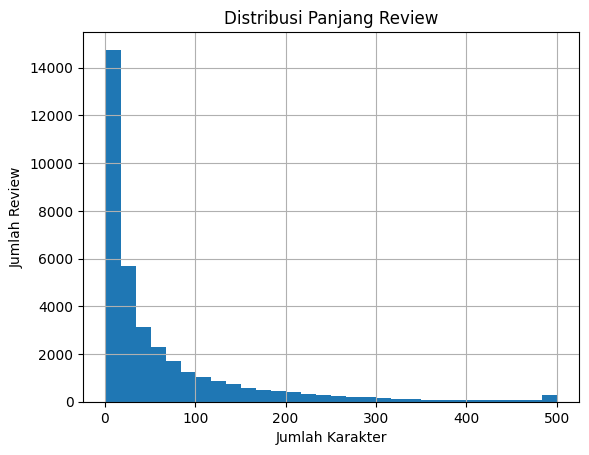

In [ ]:
df['content_length'] = df['content'].astype(str).apply(len)
df['content_length'].hist(bins=30)
plt.title('Distribusi Panjang Review')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Jumlah Review')
plt.show()


In [ ]:
df = df.dropna(subset=['content', 'score'])


In [ ]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment,has_reply,content_length
0,001fbdcd-0bae-49eb-b2d4-05e78eed6dd8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aku sudah 3th pakai gojek karena drivernya ram...,5.0,0.0,5.19.2,2025-05-27 11:06:17,NaN,NaN,5.19.2,sangat baik,False,173
1,4c7ec9fa-4005-461d-b48f-97d0595145c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,daftar meñjadi driver gojek-Go Partner seperti...,2.0,0.0,4.36.1,2025-05-27 11:02:15,"Hai Kak Ray, mohon maaf untuk kendalanya. Lapo...",2025-05-27 14:14:03,4.36.1,buruk,True,110
2,4c46cabb-93e2-4102-9911-854bdfe074da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"baguss, murah² juga harganya",5.0,0.0,5.19.2,2025-05-27 10:58:23,NaN,NaN,5.19.2,sangat baik,False,28
3,bcba130f-f286-418d-9123-f20f7637831a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menyenangkan,5.0,0.0,5.19.2,2025-05-27 10:57:03,NaN,NaN,5.19.2,sangat baik,False,12
4,4a4b714e-be8a-4450-bb6f-2ebbd230511c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap sesuai dgn tujuan,5.0,0.0,5.19.2,2025-05-27 10:47:32,NaN,NaN,5.19.2,sangat baik,False,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35869,82fa3fd6-876a-46d3-ae83-54742dce3737,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi ga jelas. saya nungguin 1 jam ga dape...,2.0,0.0,NaN,2024-11-19 13:07:18,"Mohon maaf atas kendalanya, Kak @mlvn. Kesulit...",2024-11-19 14:51:45,NaN,buruk,True,176
35870,3f9a352c-45bf-4f74-bddd-476ab42f8020,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kedua kalinya saya dipaksa untuk cancel ordera...,1.0,1.0,NaN,2024-11-19 13:02:46,"Mohon maaf atas kendalanya, Kak Eko. Kesulitan...",2024-11-19 14:49:15,NaN,sangat buruk,True,481
35871,62233720-9ca1-42c0-9bf0-127a8d40f030,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Masih masalah yang sama susah dapet driver di ...,1.0,0.0,NaN,2024-11-19 12:56:53,"Mohon maaf atas kendalanya, Kak Juli. Kesulita...",2024-11-19 14:46:53,NaN,sangat buruk,True,157
35872,85035777-5213-45a4-83e3-04d218b08378,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus mantap,",5.0,0.0,NaN,2024-11-19 12:55:51,NaN,NaN,NaN,sangat baik,False,13


In [ ]:
df['at'] = pd.to_datetime(df['at'], errors='coerce')
df['repliedAt'] = pd.to_datetime(df['repliedAt'], errors='coerce')


<ipython-input-20-c6993145eb70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['at'] = pd.to_datetime(df['at'], errors='coerce')
<ipython-input-20-c6993145eb70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['repliedAt'] = pd.to_datetime(df['repliedAt'], errors='coerce')


In [ ]:
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('unknown')
df['appVersion'] = df['appVersion'].fillna('unknown')


<ipython-input-21-ac00fccc8c75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('unknown')
<ipython-input-21-ac00fccc8c75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['appVersion'] = df['appVersion'].fillna('unknown')


In [ ]:
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df['thumbsUpCount'] = pd.to_numeric(df['thumbsUpCount'], errors='coerce')


<ipython-input-22-7fe1c1edc7d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = pd.to_numeric(df['score'], errors='coerce')
<ipython-input-22-7fe1c1edc7d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thumbsUpCount'] = pd.to_numeric(df['thumbsUpCount'], errors='coerce')


In [ ]:
df['thumbsUpCount'] = df['thumbsUpCount'].fillna(0)


<ipython-input-23-53b8ae831ae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thumbsUpCount'] = df['thumbsUpCount'].fillna(0)


In [ ]:
df = df.drop_duplicates(subset=['reviewId'])


In [ ]:
df['score'].value_counts().sort_index()


,count
score,
1.0,9076
2.0,1337
3.0,1266
4.0,1796
5.0,22399


In [ ]:
df['thumbsUpCount'].describe()


,thumbsUpCount
count,35874.000000
mean,0.998829
std,24.875480
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2922.000000


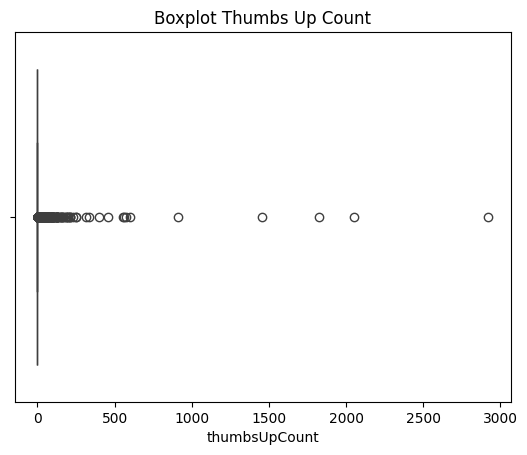

In [ ]:
sns.boxplot(x=df['thumbsUpCount'])
plt.title('Boxplot Thumbs Up Count')
plt.show()


In [ ]:
# Hitung Q1, Q3, dan IQR
Q1 = df['thumbsUpCount'].quantile(0.25)
Q3 = df['thumbsUpCount'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus baris yang berada di luar batas
df_cleaned = df[(df['thumbsUpCount'] >= lower_bound) & (df['thumbsUpCount'] <= upper_bound)]


In [ ]:
print(f"Jumlah data awal: {len(df)}")
print(f"Jumlah data setelah hapus outlier: {len(df_cleaned)}")
print(f"Jumlah data yang dihapus: {len(df) - len(df_cleaned)}")


Jumlah data awal: 35874
Jumlah data setelah hapus outlier: 30863
Jumlah data yang dihapus: 5011


In [ ]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)


sentiment
sangat baik     22399
sangat buruk     9076
baik             1796
buruk            1337
netral           1266
Name: count, dtype: int64


<ipython-input-31-3517c24b4e74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


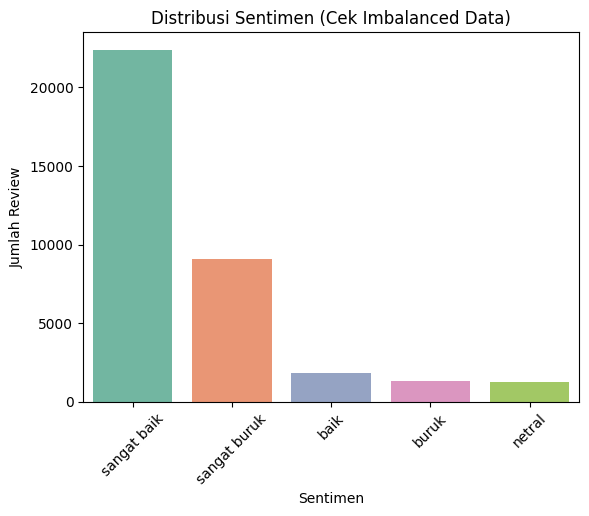

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Distribusi Sentimen (Cek Imbalanced Data)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

df['content_length'] = df['content'].astype(str).apply(len)

X = df[['thumbsUpCount', 'content_length']]
y = df['sentiment']


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print("Sebelum SMOTE:", Counter(y_train))
print("Setelah SMOTE:", Counter(y_resampled))

Sebelum SMOTE: Counter({np.int64(3): 17919, np.int64(4): 7261, np.int64(0): 1437, np.int64(1): 1069, np.int64(2): 1013})
Setelah SMOTE: Counter({np.int64(3): 17919, np.int64(1): 17919, np.int64(4): 17919, np.int64(0): 17919, np.int64(2): 17919})


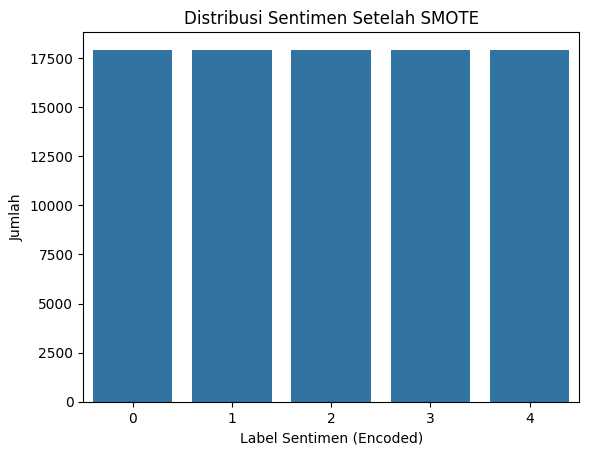

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title('Distribusi Sentimen Setelah SMOTE')
plt.xlabel('Label Sentimen (Encoded)')
plt.ylabel('Jumlah')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Gunakan hanya baris yang punya content dan sentiment
df_model = df[['content', 'sentiment']].dropna()

# Label encoding
le = LabelEncoder()
df_model['sentiment_encoded'] = le.fit_transform(df_model['sentiment'])

# Split X, y
X = df_model['content'].astype(str)
y = df_model['sentiment_encoded']

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)


In [ ]:
max_len = 100
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.utils import to_categorical

# Cek jumlah kelas
num_classes = len(le.classes_)

# Jika multi-class, one-hot encoding target
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_len))
model.add(LSTM(64, return_sequences=False))  # Bisa ganti ke SimpleRNN jika ingin lebih sederhana
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_len))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 677,509 (2.58 MB)

 Trainable params: 677,509 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=50, batch_size=128)


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 47s 208ms/step - accuracy: 0.6180 - loss: 1.0754 - val_accuracy: 0.6244 - val_loss: 1.0349
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 201ms/step - accuracy: 0.6228 - loss: 1.0421 - val_accuracy: 0.6244 - val_loss: 1.0354
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 195ms/step - accuracy: 0.6227 - loss: 1.0367 - val_accuracy: 0.6645 - val_loss: 0.8574
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 84s 204ms/step - accuracy: 0.6455 - loss: 0.8743 - val_accuracy: 0.6450 - val_loss: 0.8599
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 197ms/step - accuracy: 0.6361 - loss: 0.8809 - val_accuracy: 0.6460 - val_loss: 0.8609
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 191ms/step - accuracy: 0.6321 - loss: 0.8797 - val_accuracy: 0.6244 - val_loss: 0.8696
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 45s 201ms/step - accuracy: 0.6253 - loss: 0.8769 - val_accuracy: 0.6244 - val_loss: 0.8583
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 45s 201ms/step - accuracy: 0.6268 - loss: 0

In [ ]:
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"Akurasi: {acc:.2%}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7795 - loss: 1.0744
Akurasi: 78.56%


In [ ]:
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)
    label = le.inverse_transform([pred.argmax()])
    return label[0]

# Coba prediksi
predict_sentiment("Komentar adalah tanggapan atau ulasan terhadap sesuatu, seperti berita, pidato, atau postingan")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


'baik'

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi probabilitas kelas
y_pred_probs = model.predict(X_test)

# Ambil kelas prediksi (argmax)
y_pred = np.argmax(y_pred_probs, axis=1)


225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: tampilkan label aslinya (nama sentimen)
labels = le.classes_

# Tampilkan classification report
print(classification_report(y_test, y_pred, target_names=labels))


              precision    recall  f1-score   support

        baik       0.12      0.09      0.11       359
       buruk       0.10      0.08      0.09       268
      netral       0.10      0.08      0.09       253
 sangat baik       0.91      0.93      0.92      4480
sangat buruk       0.73      0.76      0.75      1815

    accuracy                           0.79      7175
   macro avg       0.39      0.39      0.39      7175
weighted avg       0.77      0.79      0.78      7175



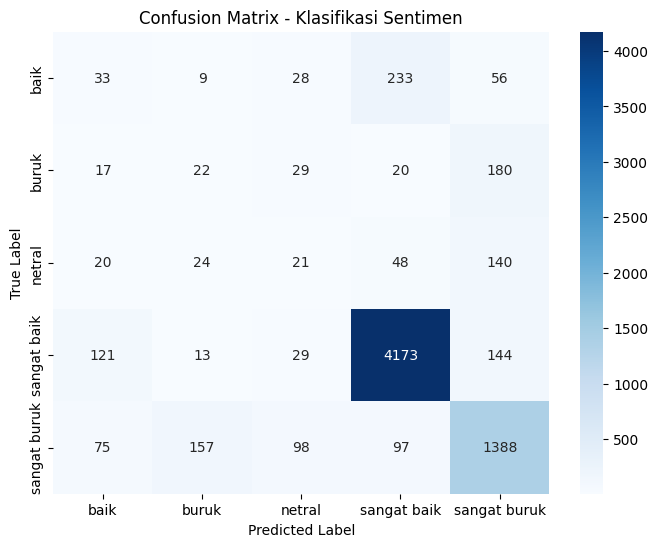

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Klasifikasi Sentimen')
plt.show()
